In [128]:
import requests as r
import pandas as pd
import json as j
import sql_functions as sf
from sql_functions import get_dataframe
import psycopg2
import os
import matplotlib
import datetime
import numpy as numpy
import matplotlib.pyplot as plt
key = os.getenv('meteostat_api_key')

table = 'hh_analytics_23_4.weather_group04_final'

In [129]:
get_dataframe(f'select * from {table} limit 5;')

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco,faa,hour,day
0,2020-08-01 00:00:00,22.8,16.8,69.0,0.0,40.0,14.8,1014.4,3,MKE,0,1
1,2020-08-01 01:00:00,21.7,15.5,68.0,0.0,30.0,13.0,1014.3,3,MKE,1,1
2,2020-08-01 02:00:00,20.6,14.5,68.0,0.0,10.0,9.4,1014.6,3,MKE,2,1
3,2020-08-01 03:00:00,20.6,14.5,68.0,0.0,360.0,9.4,1014.8,3,MKE,3,1
4,2020-08-01 04:00:00,20.6,14.9,70.0,0.0,10.0,5.4,1014.4,3,MKE,4,1


[source](https://en.wikipedia.org/wiki/August_2020_Midwest_derecho#:~:text=The%20August%202020%20Midwest%20derecho,torrential%20rain%20and%20large%20hail.)
hypothethis <br>
winddirection 67.5 - 112.5 on august 10th <br>
rise in average humidity on august 10th <br>
derechoproduced wind gusts of more than 90 miles per hour -> 144,841 km/h <br>
8am - 7 pm <br>
goal look into daily average of the month and hourly average on august 10th <br>




In [201]:
weather_s = get_dataframe(f'select * from {table}')
weather_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464 entries, 0 to 4463
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    4464 non-null   datetime64[ns]
 1   temp    4464 non-null   float64       
 2   dwpt    4464 non-null   float64       
 3   rhum    4464 non-null   float64       
 4   prcp    4463 non-null   float64       
 5   wdir    4464 non-null   float64       
 6   wspd    4464 non-null   float64       
 7   pres    4464 non-null   float64       
 8   coco    3911 non-null   float64       
 9   faa     4464 non-null   object        
 10  hour    4464 non-null   int64         
 11  day     4464 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 418.6+ KB


In [202]:
airport_names = ["General Mitchell International Airport", "O'Hare International Airport","Indianapolis International Airport","Eppley Airfield","Des Moines International Airport","St. Louis Lambert International Airport"]
cities = ['Milwaukee','Chicago', 'Indianapolis' ,'Omaha', 'Des Moines', 'St. Louis' ]
faa_list = ['MKE', 'ORD', 'IND', 'OMA', 'DSM', 'STL']

In [200]:
#-1 hour in IND because timezones

weather.hour[weather.faa == 'IND'] = weather.hour+1 

/var/folders/9j/5rxmqbbd545bhw9vljt6mdp40000gn/T/ipykernel_68526/3485076866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather.hour[weather.faa == 'IND'] = weather.hour+1


In [145]:
#weather['city'] = weather 
weather.columns

Index(['time', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'coco',
       'faa', 'hour', 'day'],
      dtype='object')

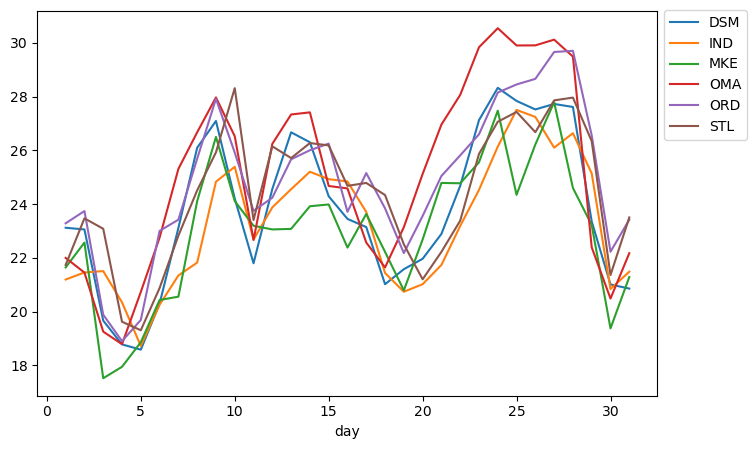

In [148]:
# mean temp in August 2020 per day
dfp = weather.pivot_table(index='day', columns='faa', values='temp')

# plot
ax = dfp.plot(figsize=(8, 5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

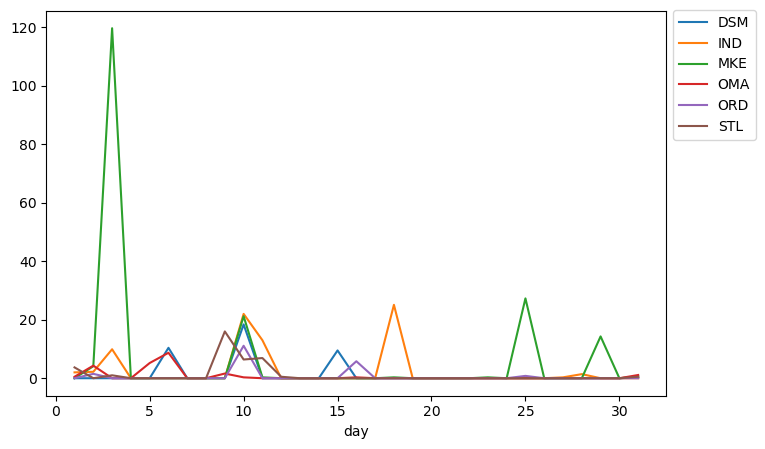

In [147]:
# total rain in August 2020 per day
dfp = weather.pivot_table(index='day', columns='faa', values='prcp', aggfunc='sum')

# plot
ax = dfp.plot(figsize=(8, 5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

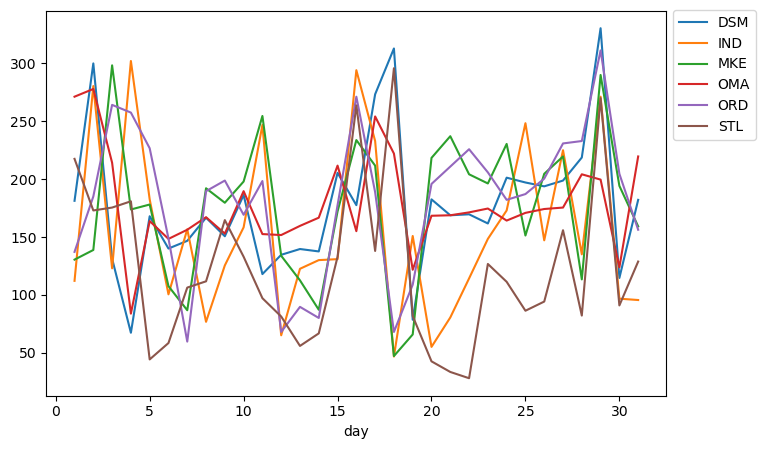

In [149]:
# total winddirectionin August 2020 per day
dfp = weather.pivot_table(index='day', columns='faa', values='wdir')

# plot
ax = dfp.plot(figsize=(8, 5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

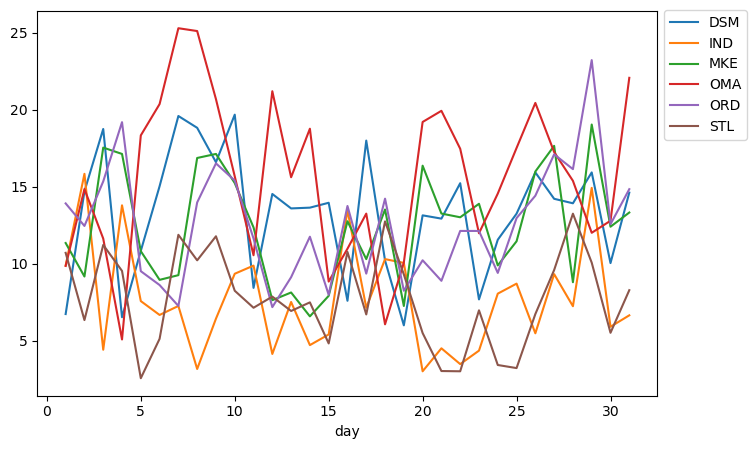

In [154]:
# avg windspeed in August 2020 per day
dfp = weather.pivot_table(index='day', columns='faa', values='wspd')

# plot
ax = dfp.plot(figsize=(8, 5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

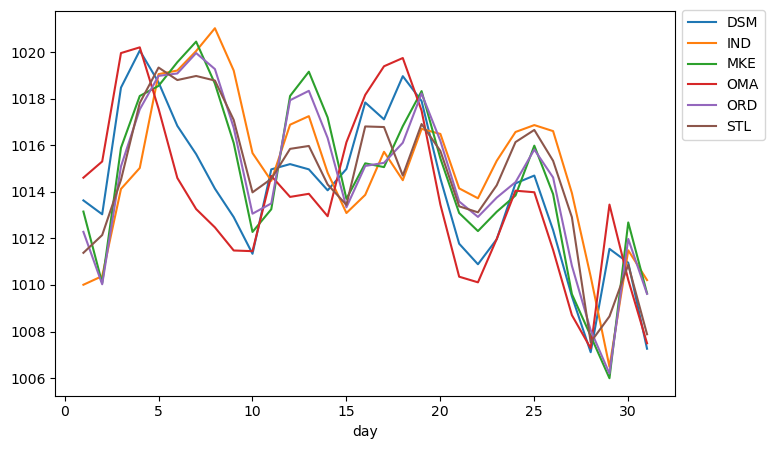

In [155]:
# avg air pressure in August 2020 per day
dfp = weather.pivot_table(index='day', columns='faa', values='pres')

# plot
ax = dfp.plot(figsize=(8, 5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [184]:
weather_10 =weather[weather.day == 10]
display(
weather_10.head(),
weather_10.info()
)


<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 216 to 3959
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    144 non-null    datetime64[ns]
 1   temp    144 non-null    float64       
 2   dwpt    144 non-null    float64       
 3   rhum    144 non-null    float64       
 4   prcp    144 non-null    float64       
 5   wdir    144 non-null    float64       
 6   wspd    144 non-null    float64       
 7   pres    144 non-null    float64       
 8   coco    124 non-null    float64       
 9   faa     144 non-null    object        
 10  hour    144 non-null    int64         
 11  day     144 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 14.6+ KB


,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco,faa,hour,day
216,2020-08-10 00:00:00,22.0,21.0,94.0,5.6,310.0,20.5,1015.0,7.0,MKE,0,10
217,2020-08-10 01:00:00,22.2,20.7,91.0,0.2,110.0,11.2,1012.7,8.0,MKE,1,10
218,2020-08-10 02:00:00,22.8,20.0,84.0,0.5,180.0,9.4,1013.1,18.0,MKE,2,10
219,2020-08-10 03:00:00,22.8,20.0,84.0,0.0,210.0,18.4,1014.0,8.0,MKE,3,10
220,2020-08-10 04:00:00,23.3,20.6,85.0,0.0,200.0,16.6,1014.0,8.0,MKE,4,10


None

In [185]:
display(
weather.groupby('day').coco.value_counts(),
weather_10.groupby('day').coco.value_counts()
)

day  coco
1    3.0     49
     2.0     26
     7.0     25
     4.0     13
     1.0      9
             ..
31   8.0     10
     5.0      4
     4.0      2
     18.0     2
     25.0     1
Name: count, Length: 236, dtype: int64

day  coco
10   8.0     45
     7.0     35
     18.0    15
     25.0     8
     2.0      7
     3.0      5
     26.0     5
     5.0      3
     9.0      1
Name: count, dtype: int64

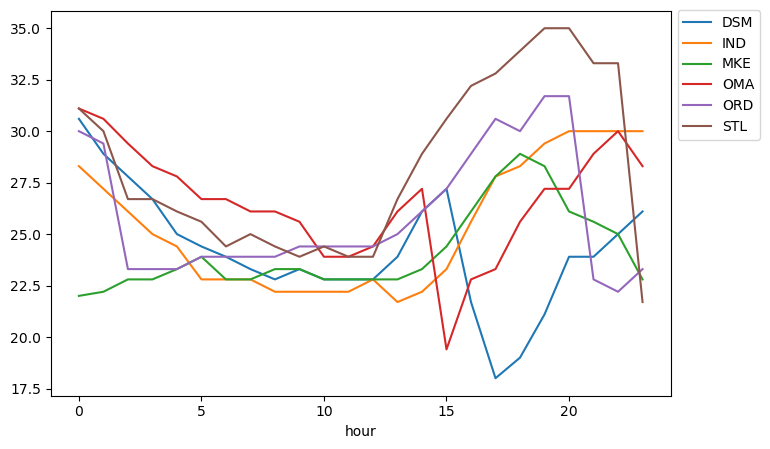

In [188]:
# mean temp in August 10 2020 per hour
dfp = weather_10.pivot_table(index='hour', columns='faa', values='temp')

# plot
ax = dfp.plot(figsize=(8, 5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

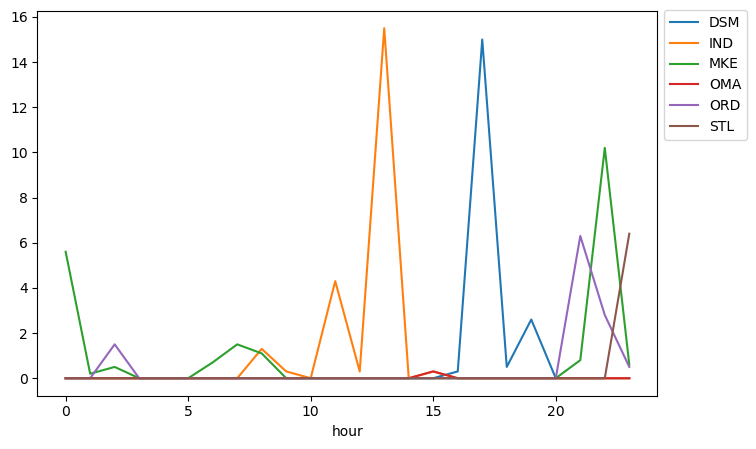

In [192]:
# total rain in August 10 2020 per hour
dfp = weather_10.pivot_table(index='hour', columns='faa', values='prcp')

# plot
ax = dfp.plot(figsize=(8, 5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

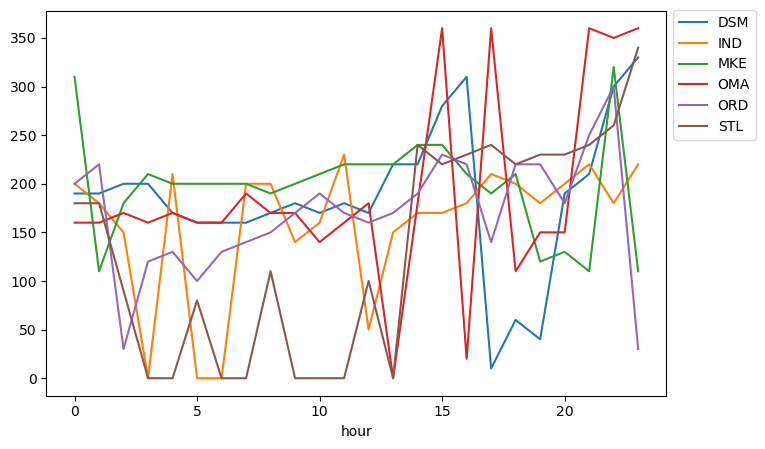

In [193]:
# total windirection in August 10 2020 per hour
dfp = weather_10.pivot_table(index='hour', columns='faa', values='wdir')

# plot
ax = dfp.plot(figsize=(8, 5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

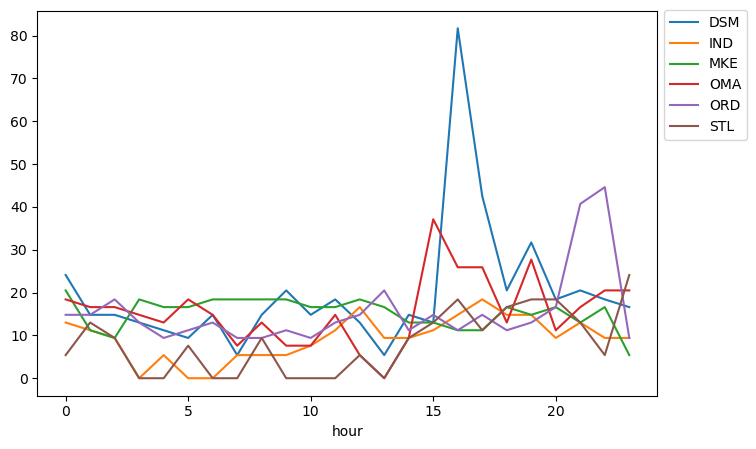

In [194]:
#  windspeed in August 10 2020 per hour
dfp = weather_10.pivot_table(index='hour', columns='faa', values='wspd')

# plot
ax = dfp.plot(figsize=(8, 5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

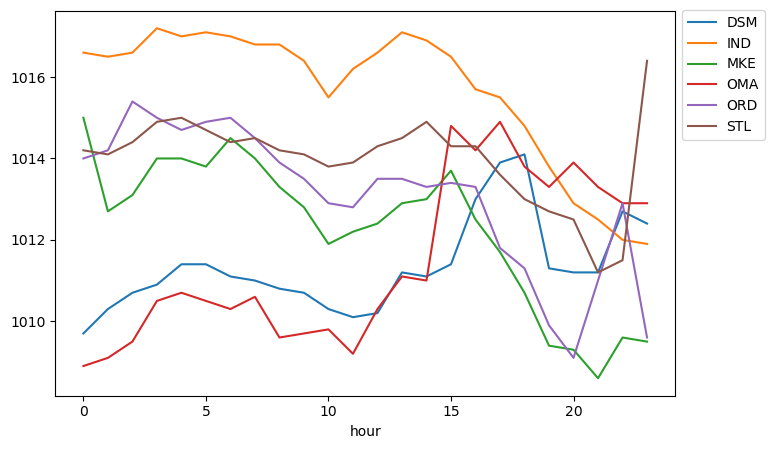

In [195]:
#  air pressure in August 10 2020 per hour
dfp = weather_10.pivot_table(index='hour', columns='faa', values='pres')

# plot
ax = dfp.plot(figsize=(8, 5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

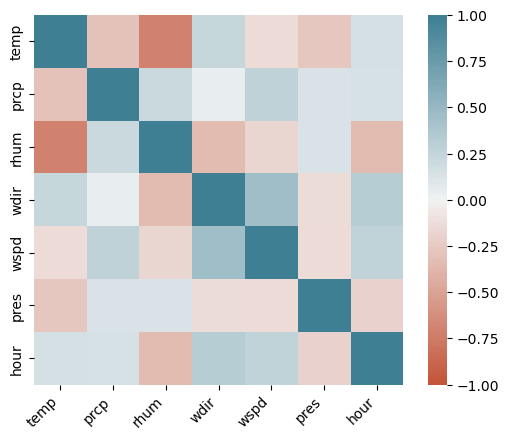

In [196]:
import seaborn as sns
#heatmap four hourly on august 10th
corr = weather_10[[ 'temp', 'prcp', 'rhum', 'wdir', 'wspd', 'pres', 'hour']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# wdir/wsp, rhum/temp

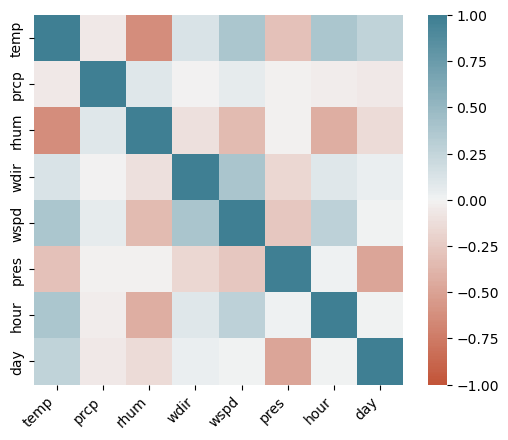

In [198]:
import seaborn as sns
#heatmap four hourly on august 10th
corr = weather[[ 'temp', 'prcp', 'rhum', 'wdir', 'wspd', 'pres', 'hour','day']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#rhum/temp/hour , wdir/wspd, temp/hour, day/pres